# Decision Tree

In [68]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import confusion_matrix
import joblib

In [5]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
x , y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(x.shape)
print(y.shape)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1797, 64)
(1797,)
(1437, 64) (360, 64)
(1437,) (360,)


# Fit

default depth : None

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
print(f"train accuracy : {clf.score(x_train,y_train)}")
print(f"test accuracy : {clf.score(x_test,y_test)}")

train accuracy : 1.0
test accuracy : 0.8055555555555556


After scaling :

In [13]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

clf_scale = DecisionTreeClassifier()
clf_scale.fit(x_train_scale,y_train)

print(f"train accuracy : {clf_scale.score(x_train_scale,y_train)}")
print(f"test accuracy : {clf_scale.score(x_test_scale,y_test)}")

train accuracy : 1.0
test accuracy : 0.8194444444444444


Searching for best depth :

In [40]:
train = []
test = []

for i in range(1,10):
    clf_test = DecisionTreeClassifier(max_depth=i)
    clf_test.fit(x_train_scale,y_train)
    train.append(clf_test.score(x_train_scale,y_train))
    test.append(clf_test.score(x_test_scale,y_test))
    
print(train.index(max(train)))
print(test.index(max(test)))

8
8


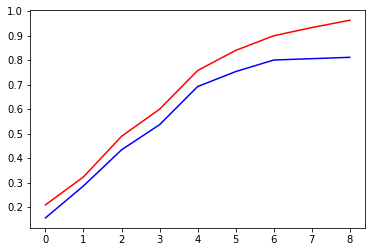

In [41]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.show()

In [42]:
clf_main = DecisionTreeClassifier(max_depth=8)
clf_main.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=8)

In [43]:
print(f"train accuracy : {clf_main.score(x_train_scale,y_train)}")
print(f"test accuracy : {clf_main.score(x_test_scale,y_test)}")

train accuracy : 0.9324982602644398
test accuracy : 0.8083333333333333


# visualize the tree

In [50]:
tree = export_graphviz(clf_main,out_file="tree.dot", filled=True,class_names=str(digits.target_names),
                       feature_names=digits.feature_names)

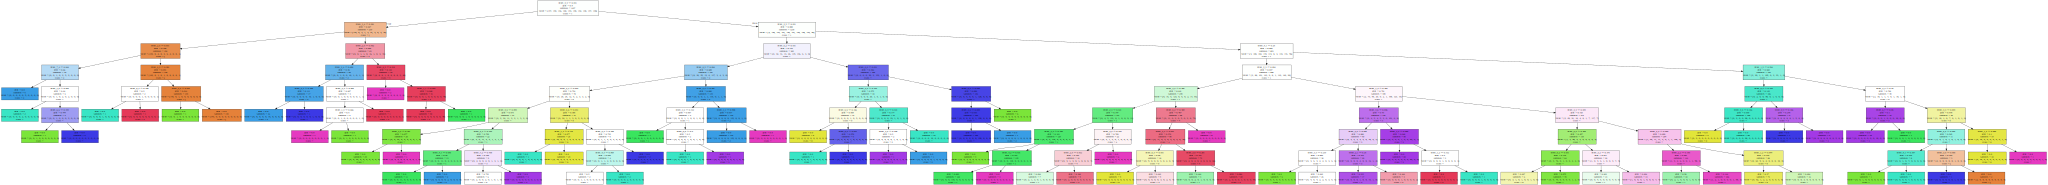

In [55]:
with open("tree.dot") as f:
    dot = f.read()
graphviz.Source(dot)
    

# Tree (text)

In [63]:
tree_text = export_text(clf_main,feature_names=digits.feature_names, max_depth=2)
print(tree_text)

|--- pixel_4_4 <= 0.03
|   |--- pixel_3_4 <= 0.28
|   |   |--- pixel_2_5 <= 0.03
|   |   |   |--- truncated branch of depth 4
|   |   |--- pixel_2_5 >  0.03
|   |   |   |--- truncated branch of depth 3
|   |--- pixel_3_4 >  0.28
|   |   |--- pixel_2_5 <= 0.56
|   |   |   |--- truncated branch of depth 4
|   |   |--- pixel_2_5 >  0.56
|   |   |   |--- truncated branch of depth 3
|--- pixel_4_4 >  0.03
|   |--- pixel_2_5 <= 0.03
|   |   |--- pixel_5_2 <= 0.53
|   |   |   |--- truncated branch of depth 6
|   |   |--- pixel_5_2 >  0.53
|   |   |   |--- truncated branch of depth 5
|   |--- pixel_2_5 >  0.03
|   |   |--- pixel_4_1 <= 0.25
|   |   |   |--- truncated branch of depth 6
|   |   |--- pixel_4_1 >  0.25
|   |   |   |--- truncated branch of depth 6



# Prediction

In [64]:
y_pred = clf_main.predict(x_test_scale)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30  0  0  0  1  0  0  0  0  0]
 [ 0 33  1  0  3  0  0  1  1  3]
 [ 0  2 34  1  1  0  1  1  1  0]
 [ 0  0  1 20  0  0  0  1  1  2]
 [ 0  0  0  0 34  1  1  1  1  0]
 [ 1  0  0  0  0 28  1  1  1  2]
 [ 0  0  0  0  1  1 37  0  0  0]
 [ 0  2  1  1  1  0  0 34  2  0]
 [ 0  1  6  3  0  0  0  1 15  1]
 [ 1  0  2  8  1  0  0  0  4 26]]


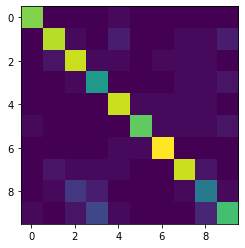

In [65]:
plt.imshow(cm)
plt.show()

# Feature_importance

In [66]:
print(clf_main.feature_importances_)

[0.         0.         0.01806917 0.00086435 0.00144058 0.0472881
 0.00086435 0.         0.         0.00340032 0.01385881 0.00086435
 0.         0.02427171 0.         0.         0.         0.00286929
 0.01504887 0.03926099 0.04561245 0.10043027 0.         0.
 0.         0.         0.06135612 0.05919045 0.05706398 0.01351325
 0.         0.         0.         0.0655161  0.00979252 0.0104778
 0.08291865 0.02297827 0.01197107 0.         0.         0.
 0.08806145 0.06596419 0.00234608 0.01656661 0.00491135 0.
 0.         0.         0.00703145 0.00528212 0.         0.00573914
 0.02495344 0.00163771 0.         0.         0.00220889 0.
 0.06476232 0.         0.00161345 0.        ]


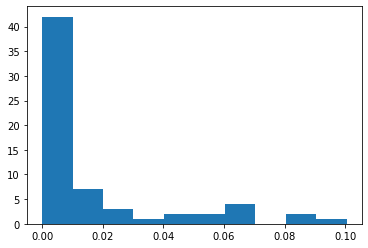

In [67]:
plt.hist(clf_main.feature_importances_)
plt.show()

# Save

In [69]:
joblib.dump(clf_main,filename="tree.pkl")

['tree.pkl']